<a href="https://colab.research.google.com/github/yashjagtap81/score-prediction/blob/main/IPLScoreprediction01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

In [4]:
ipl = pd.read_csv('/content/ipl_data (2).csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1.0,0.0,0.1,1.0,0.0,0.0,0.0,222.0
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1.0,0.0,0.2,1.0,0.0,0.0,0.0,222.0
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.2,2.0,0.0,0.0,0.0,222.0
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.3,2.0,0.0,0.0,0.0,222.0
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.4,2.0,0.0,0.0,0.0,222.0


/tmp/ipython-input-5-4279990697.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=matches_count.values, y=matches_count.index,palette="cividis")


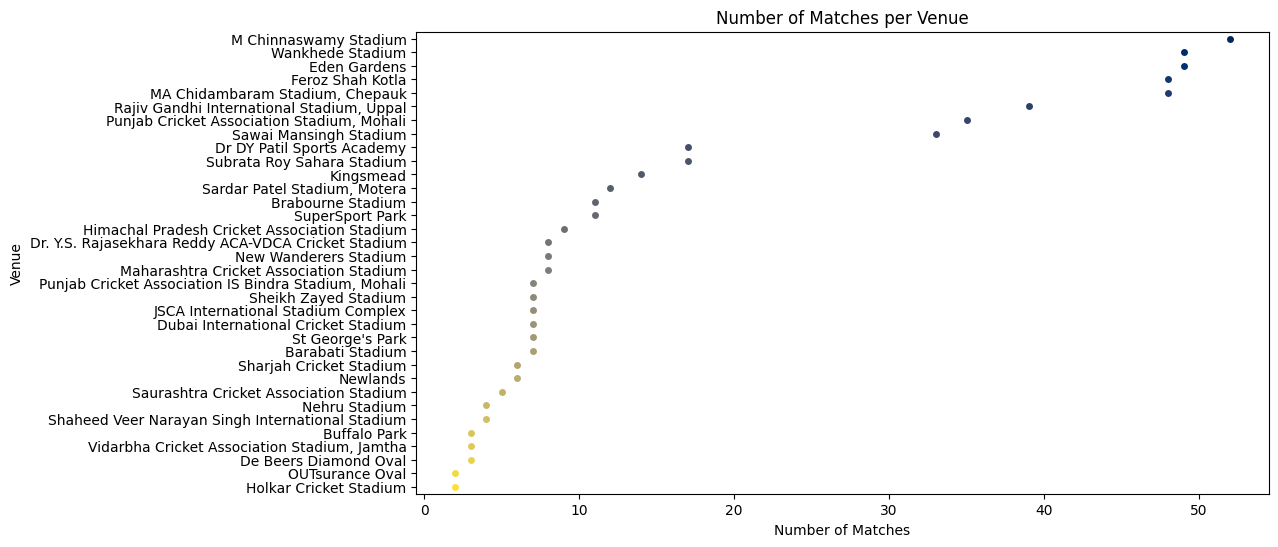

In [5]:
data = ipl.copy()
matches_per_venue = data[['mid', 'venue']].drop_duplicates()
matches_count = matches_per_venue['venue'].value_counts()

plt.figure(figsize=(11,6))
sns.stripplot(x=matches_count.values, y=matches_count.index,palette="cividis")
plt.title('Number of Matches per Venue')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()

/tmp/ipython-input-6-1464945445.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=wickets_by_bowler.values, y=wickets_by_bowler.index, palette="muted")


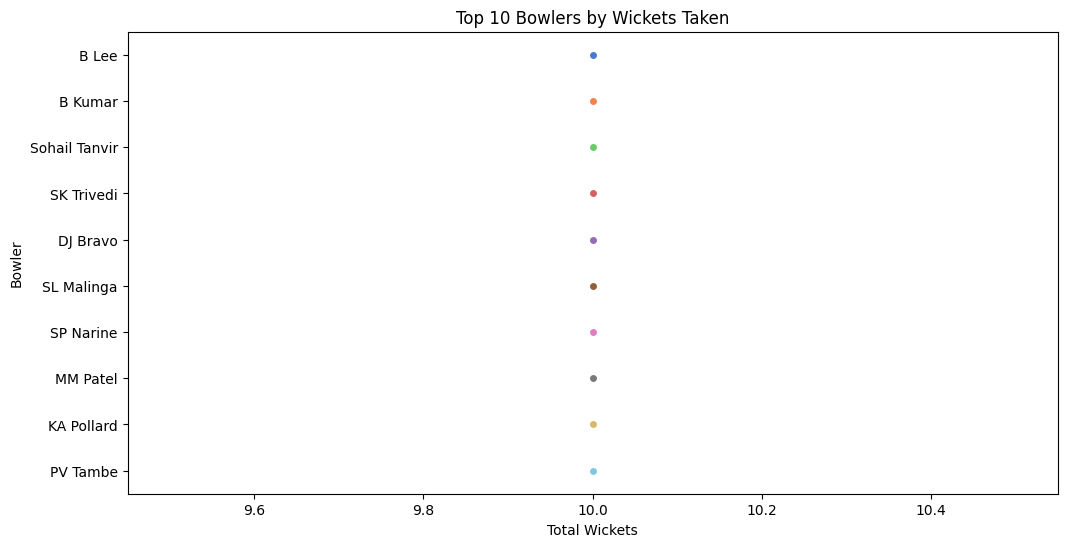

In [6]:
wickets_by_bowler = data.groupby('bowler')['wickets'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.stripplot(x=wickets_by_bowler.values, y=wickets_by_bowler.index, palette="muted")
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()

/tmp/ipython-input-7-903061492.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=wickets_by_bowler.values, y=wickets_by_bowler.index, palette="tab20")


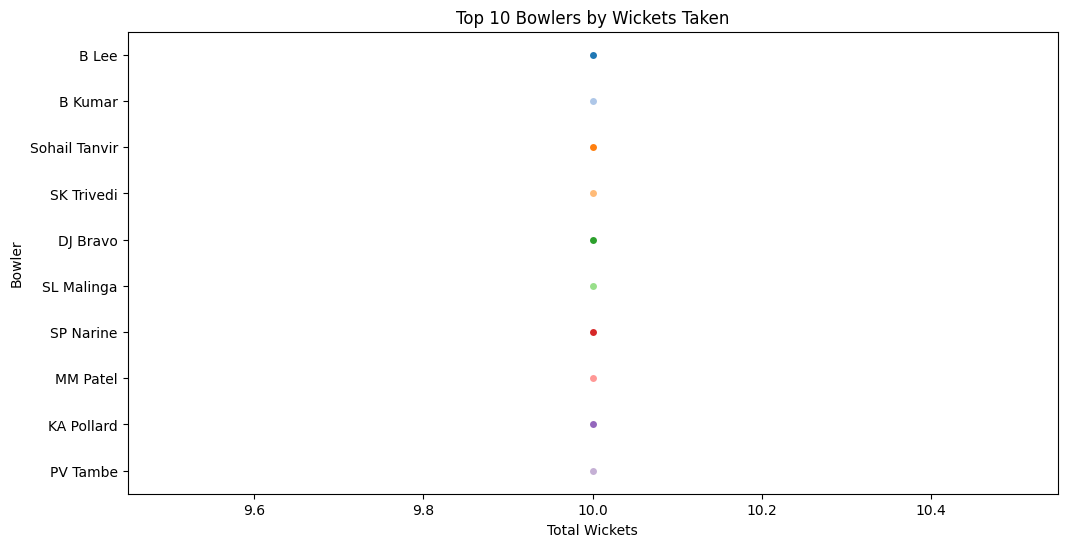

In [7]:
wickets_by_bowler = data.groupby('bowler')['wickets'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.stripplot(x=wickets_by_bowler.values, y=wickets_by_bowler.index, palette="tab20")
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['bat_team', 'bowl_team', 'venue', "batsman", "bowler"]

data_encoded = data.copy()

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

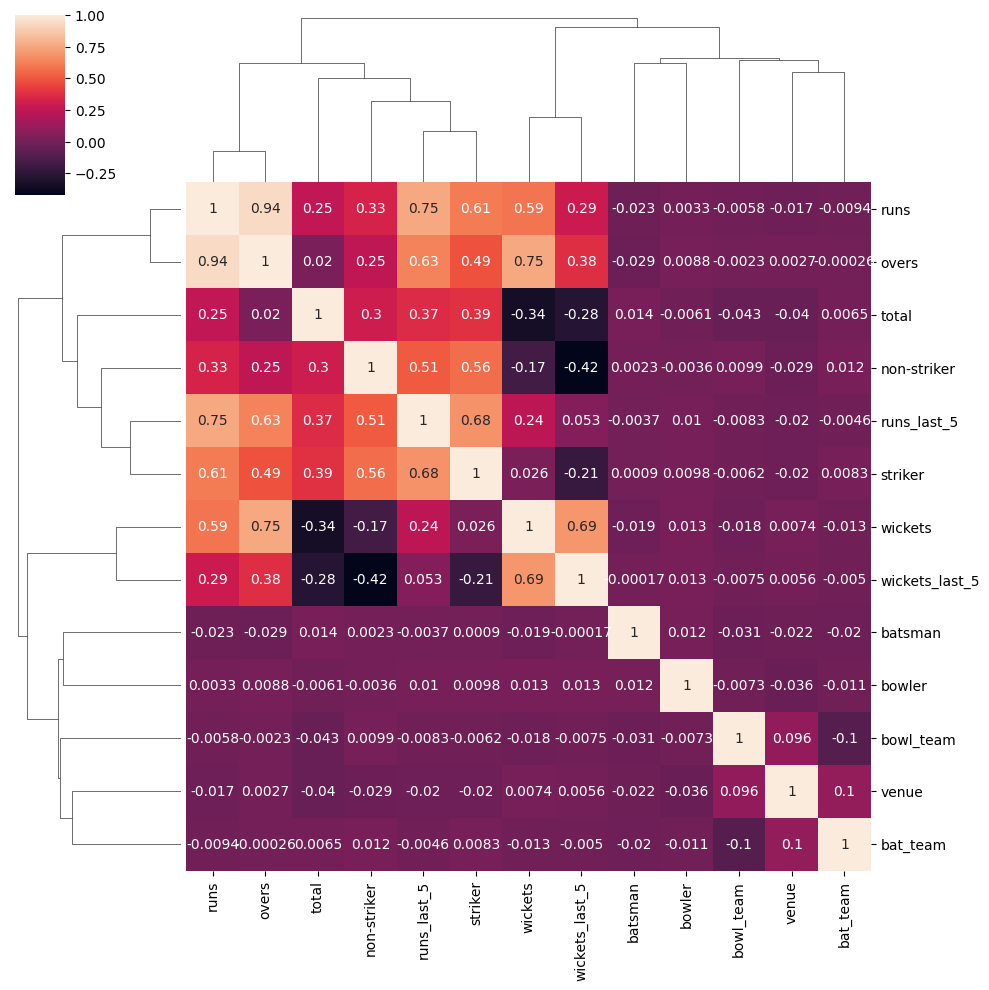

In [9]:
data_corr=data_encoded.drop(columns=["date","mid"],axis=10)
sns.clustermap(data_corr.corr(),annot=True)
plt.show()

In [12]:
feature_cols = ['bat_team', 'bowl_team', 'venue', 'runs', 'wickets', 'overs','striker','batsman','bowler']

X = data_encoded[feature_cols]
y = data_encoded['total']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(216, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)

history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/10
738/738 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: nan - val_loss: nan
Epoch 2/10
738/738 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: nan - val_loss: nan
Epoch 3/10
738/738 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: nan - val_loss: nan
Epoch 4/10
738/738 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: nan - val_loss: nan
Epoch 5/10
738/738 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: nan - val_loss: nan
Epoch 6/10
738/738 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: nan - val_loss: nan
Epoch 7/10
738/738 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: nan - val_loss: nan
Epoch 8/10
738/738 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: nan - val_loss: nan
Epoch 9/10
738/738 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: nan - val_loss: nan
Epoch 10/10
738/738 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: nan - val_loss: nan


In [15]:
model.fit(X_train_scaled, y_train, epochs=5, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/5
738/738 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: nan - val_loss: nan
Epoch 2/5
738/738 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: nan - val_loss: nan
Epoch 3/5
738/738 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: nan - val_loss: nan
Epoch 4/5
738/738 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: nan - val_loss: nan
Epoch 5/5
738/738 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: nan - val_loss: nan


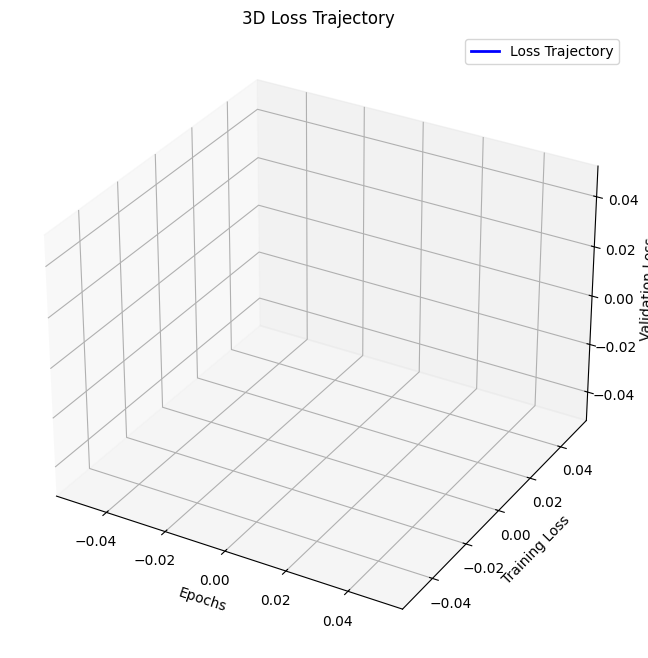

In [19]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

epochs = np.arange(len(history.history['loss']))

# Plot training and validation loss as a 3D line
ax.plot(epochs,
        history.history['loss'],
        history.history['val_loss'],
        label='Loss Trajectory',
        color='blue',
        linewidth=2)

ax.set_xlabel('Epochs')
ax.set_ylabel('Training Loss')
ax.set_zlabel('Validation Loss')
ax.set_title('3D Loss Trajectory')
ax.legend()

plt.show()

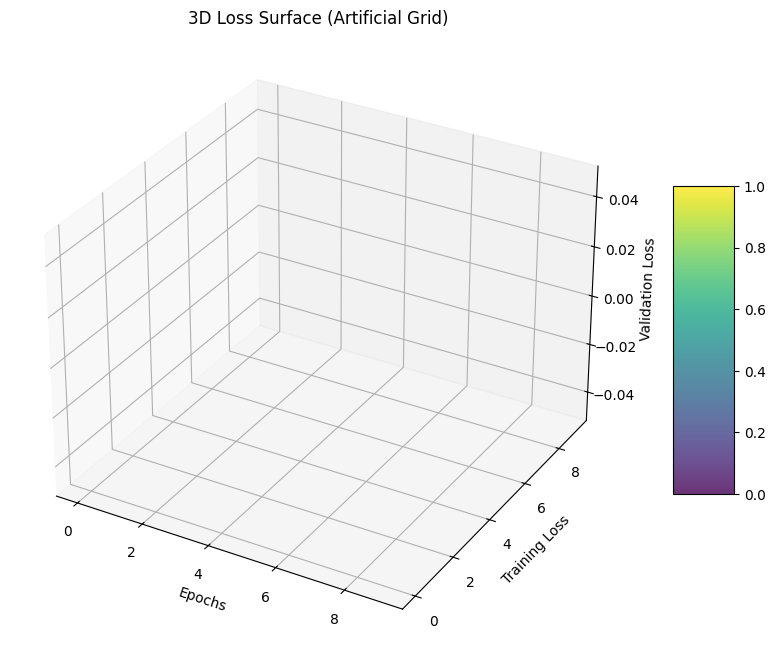

In [22]:
from matplotlib import cm

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

epochs = np.arange(len(history.history['loss']))
loss = np.array(history.history['loss'])
val_loss = np.array(history.history['val_loss'])

# Create a grid (if needed)
X, Y = np.meshgrid(epochs, epochs)  # Adjust as needed
Z = np.outer(loss, val_loss)        # Example (modify based on your data)

surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('Epochs')
ax.set_ylabel('Training Loss')
ax.set_zlabel('Validation Loss')
plt.title('3D Loss Surface (Artificial Grid)')
plt.show()

In [23]:
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

633/633 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


ValueError: Input contains NaN.

In [24]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=list(label_encoders['venue'].classes_), description='Select Venue:')
venue.style = {'description_width': 'initial'}

batting_team = widgets.Dropdown(options=list(label_encoders['bat_team'].classes_), description='Select Batting Team:')
batting_team.style = {'description_width': 'initial'}

bowling_team = widgets.Dropdown(options=list(label_encoders['bowl_team'].classes_), description='Select Bowling Team:')
bowling_team.style = {'description_width': 'initial'}

striker = widgets.Dropdown(options=list(label_encoders['batsman'].classes_), description='Select Striker:')
striker.style = {'description_width': 'initial'}

bowler = widgets.Dropdown(options=list(label_encoders['bowler'].classes_), description='Select Bowler:')
bowler.style = {'description_width': 'initial'}

runs = widgets.IntText(value=0, description='Runs:', style={'description_width': 'initial'})
wickets = widgets.IntText(value=0, description='Wickets:', style={'description_width': 'initial'})
overs = widgets.FloatText(value=0.0, description='Overs:', style={'description_width': 'initial'})
striker_ind = widgets.IntText(value=0, description='Striker:', style={'description_width': 'initial'})  # Assuming 0 or 1
predict_button = widgets.Button(description="Predict Score")

output = widgets.Output()

def predict_score(b):
    with output:
        clear_output()  # Clear previous output

        encoded_venue = label_encoders['venue'].transform([venue.value])[0]
        encoded_batting_team = label_encoders['bat_team'].transform([batting_team.value])[0]
        encoded_bowling_team = label_encoders['bowl_team'].transform([bowling_team.value])[0]
        encoded_striker = label_encoders['batsman'].transform([striker.value])[0]
        encoded_bowler = label_encoders['bowler'].transform([bowler.value])[0]

        input_features = [
            encoded_batting_team,
            encoded_bowling_team,
            encoded_venue,
            runs.value,
            wickets.value,
            overs.value,
            striker_ind.value,
            encoded_striker,
            encoded_bowler
        ]

        input_array = np.array(input_features).reshape(1, -1)
        input_array = scaler.transform(input_array)
        predicted_score = model.predict(input_array)


        print(f"Predicted Total Runs: {int(predicted_score[0])}")

predict_button.on_click(predict_score)

display(venue, batting_team, bowling_team, striker, bowler,
        runs, wickets, overs,
        striker_ind,
        predict_button, output)

Dropdown(description='Select Venue:', options=('Barabati Stadium', 'Brabourne Stadium', 'Buffalo Park', 'De Be…

Dropdown(description='Select Batting Team:', options=('Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredev…

Dropdown(description='Select Bowling Team:', options=('Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredev…

Dropdown(description='Select Striker:', options=('A Ashish Reddy', 'A Chandila', 'A Chopra', 'A Flintoff', 'A …

Dropdown(description='Select Bowler:', options=('A Ashish Reddy', 'A Chandila', 'A Flintoff', 'A Kumble', 'A M…

IntText(value=0, description='Runs:', style=DescriptionStyle(description_width='initial'))

IntText(value=0, description='Wickets:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='Overs:', style=DescriptionStyle(description_width='initial'))

IntText(value=0, description='Striker:', style=DescriptionStyle(description_width='initial'))

Button(description='Predict Score', style=ButtonStyle())

Output()

In [ ]:
!pip install --upgrade keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
